In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

from marioGame import standard_grid, negative_grid, print_policy, print_values
from tqdm import tqdm

C:\Users\duasp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Some Basic Directories for housekeeping
# set location of input files:
inpDir = os.path.join( '..', 'input')

outDir = os.path.join('..', 'output')

# define and set random state 
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible results
SMALL_ENOUGH = 1e-3
GAMMA = 1.0    # 0.99
ALL_POSSIBLE_ACTIONS = ('U', 'D', 'L', 'R')

CMAP = plt.cm.rainbow
plt.set_cmap(CMAP);
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

# Define constants for data manipulation
TEST_SIZE = 0.2
NOISE = 0.2
N_SAMPLE = 1024

<Figure size 640x480 with 0 Axes>

In [3]:
# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',    
          'figure.figsize': (15, 8),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
          'savefig.dpi': 75,
          'image.cmap': 'summer',
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 1,
          'legend.numpoints' : 1
         }


plt.rcParams.update(params)

'''plt.rc('axes', prop_cycle=(
    cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))
'''
np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('display.precision', 2)

__all__ = ['np', 'display', 'plt', 'pd', 'sklearn', 'seaborn']

In [4]:
def fn_plot_grid(V):
    plot_grid = np.zeros((3,4))    # Placeholder for state values
    
    for i,j in V:
        plot_grid[i,j] = V[(i,j)]
        
    fig, axes = plt.subplots(1,2)
    
    sns.heatmap(plot_grid, annot = True,
               fmt = '0.3f', cmap = 'RdYlGn', ax = axes[0],
               cbar = False)
    
    im = mpimg.imread('C:/Users/duasp/Machine Learning/mario_game.png')
    
    ax = axes[1]
    ax.imshow(im)
    ax.grid(False)
    ax.axis('off')
    plt.show()

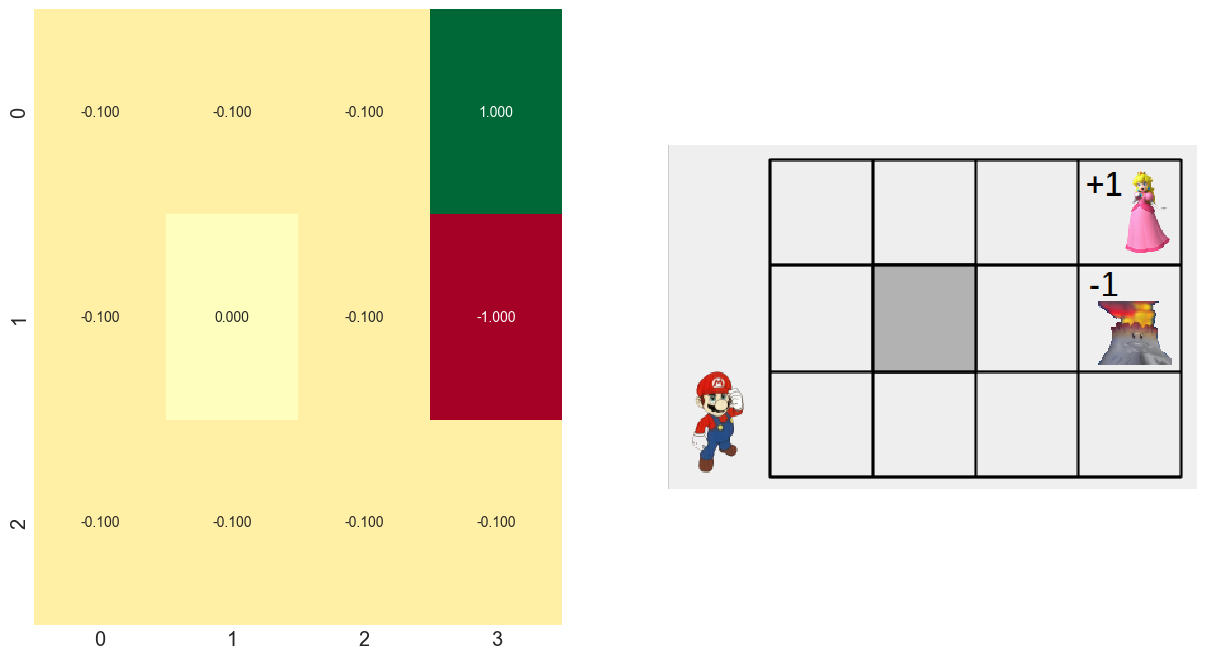

In [5]:
grid = negative_grid()

fn_plot_grid(grid.rewards)

In [6]:
grid.actions.keys()

dict_keys([(0, 0), (0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1), (2, 2), (2, 3)])

In [7]:
states = grid.all_states()
states

{(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 0),
 (1, 2),
 (1, 3),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3)}

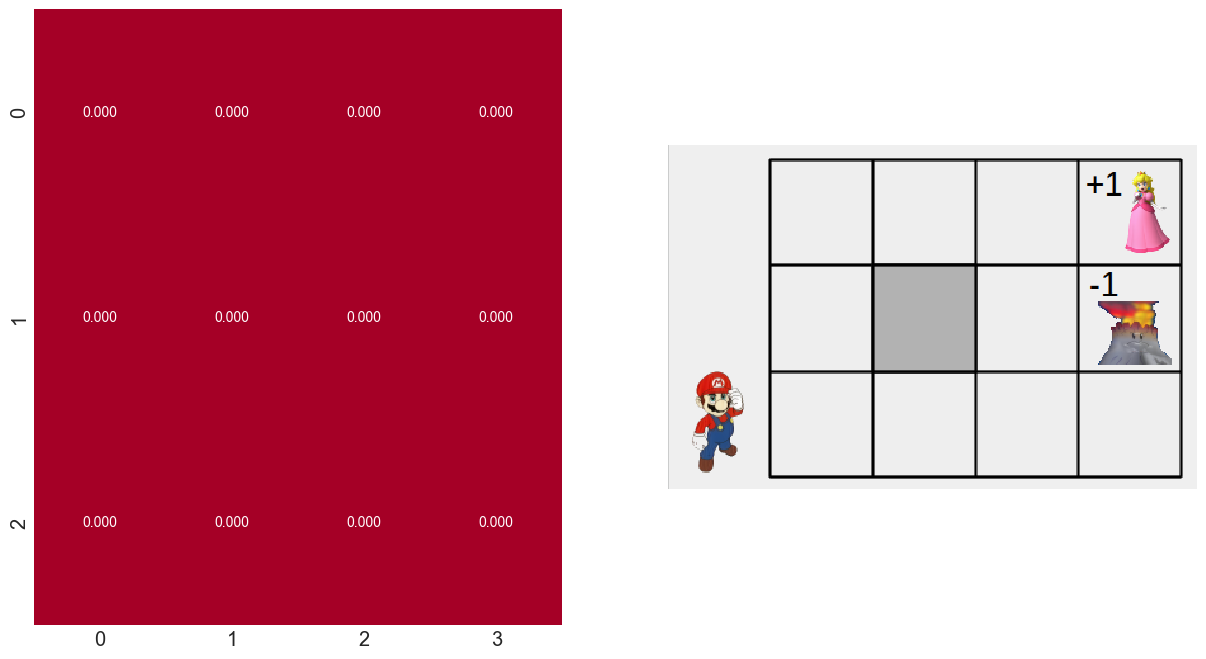

In [8]:
V = {}

for s in states:
    V[s] = 0
    
fn_plot_grid(V)    

### All states values in one go



Values 0: 


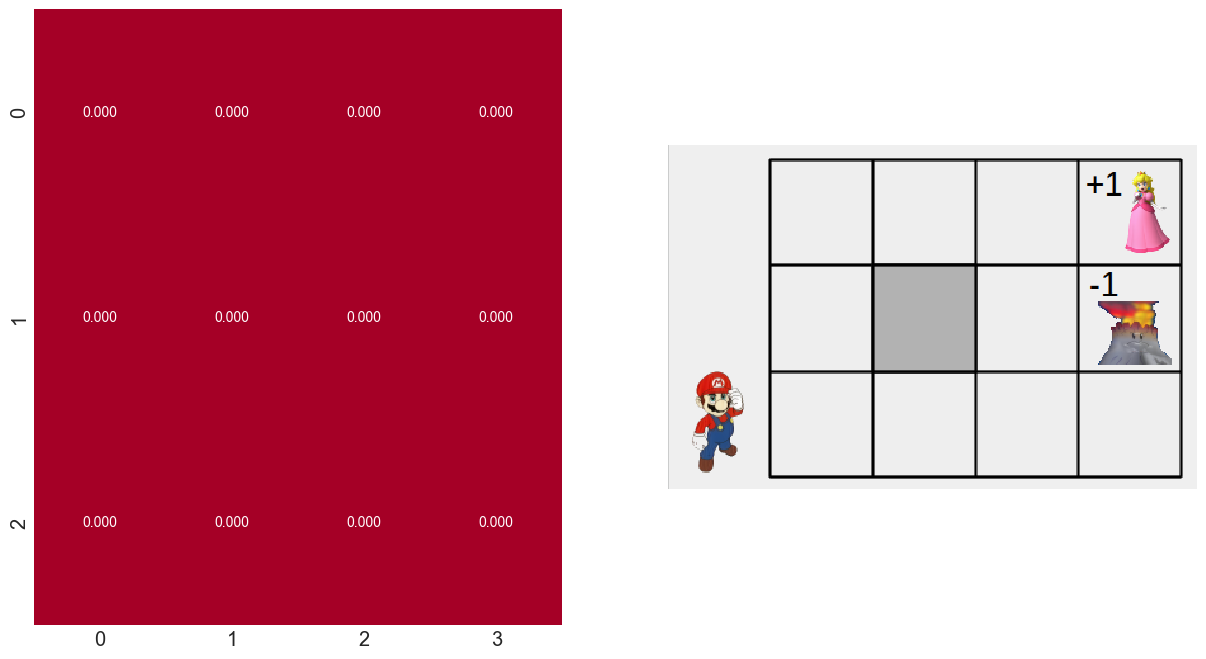

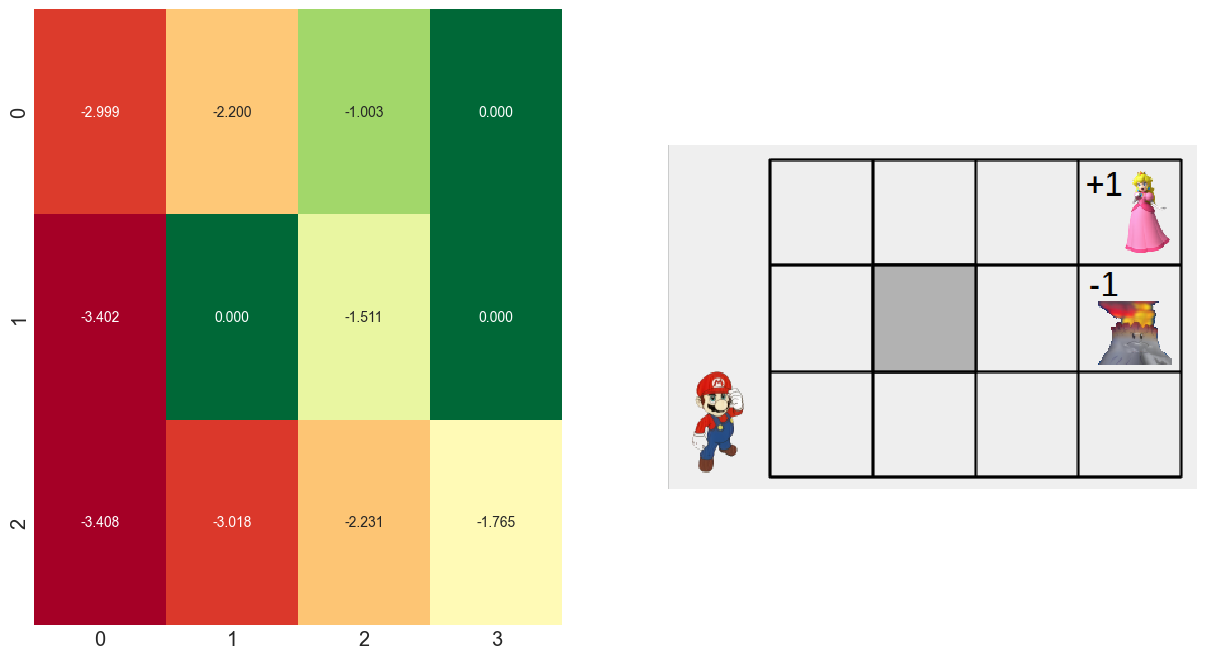

In [9]:
ii = 0       # Counter

change = []    # Collect changes in the state value

new_V = V.copy()

print("\n\nValues %d: " %ii)

fn_plot_grid(V)

while True:
    ii += 1
    biggest_change = 0
    sum_change = 0      # sum of change in one iteration
    
    for s in states:
        old_V = V[s]
        if s in grid.actions.keys():
            sum_v = 0
            
            for a in ALL_POSSIBLE_ACTIONS:
                grid.set_state(s)
                r = grid.move(a)       # get the reward
                curr_v = r + GAMMA * V[grid.current_state()]
                sum_v += curr_v * 0.25     # Random Policy,so 0.25 in each direction
        
            new_V[s] = sum_v
            biggest_change = max(biggest_change, np.abs(old_V - new_V[s]))
            sum_change += biggest_change
    change.append(sum_change)
    V = new_V.copy()       # Update in one go
    if biggest_change < SMALL_ENOUGH:
        fn_plot_grid(new_V)
        break

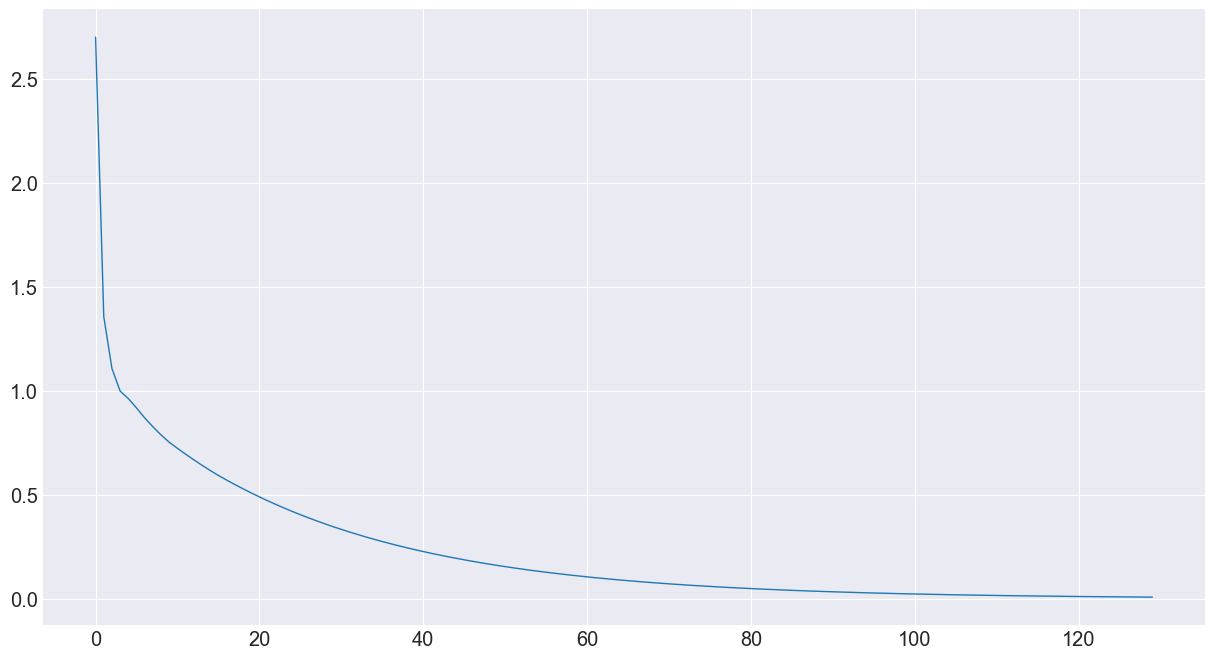

In [10]:
change
plt.plot(change)

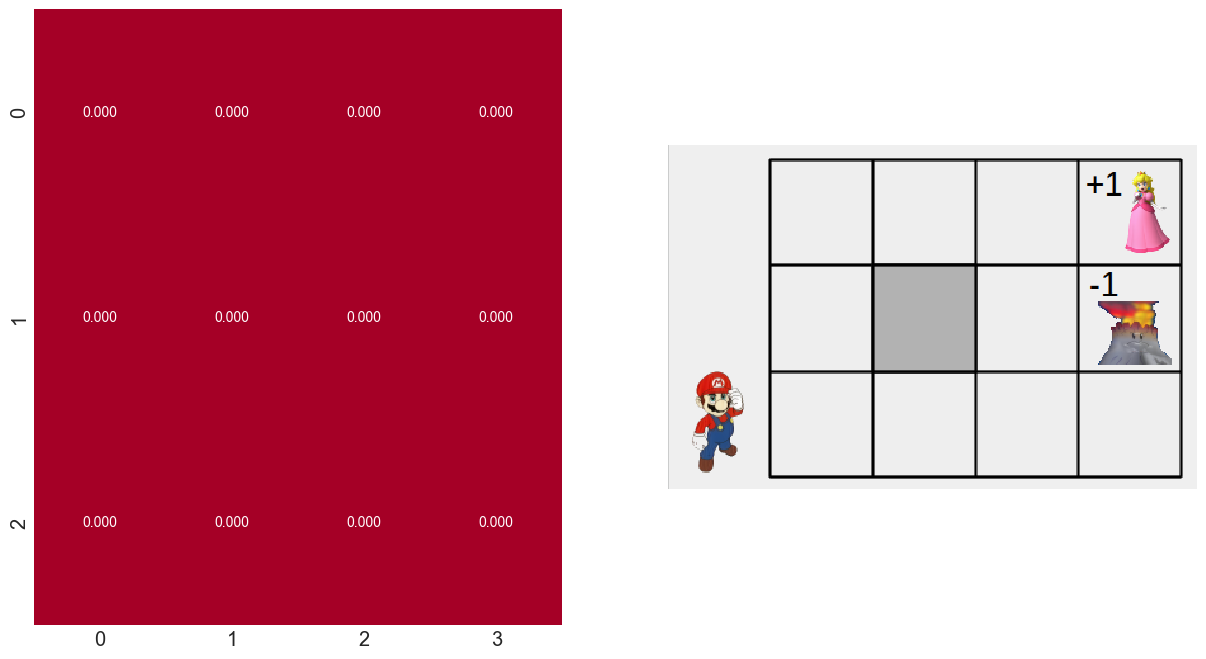

In [11]:
V = {}

for s in states:
    V[s] = 0
    
fn_plot_grid(V)  



Values 0: 


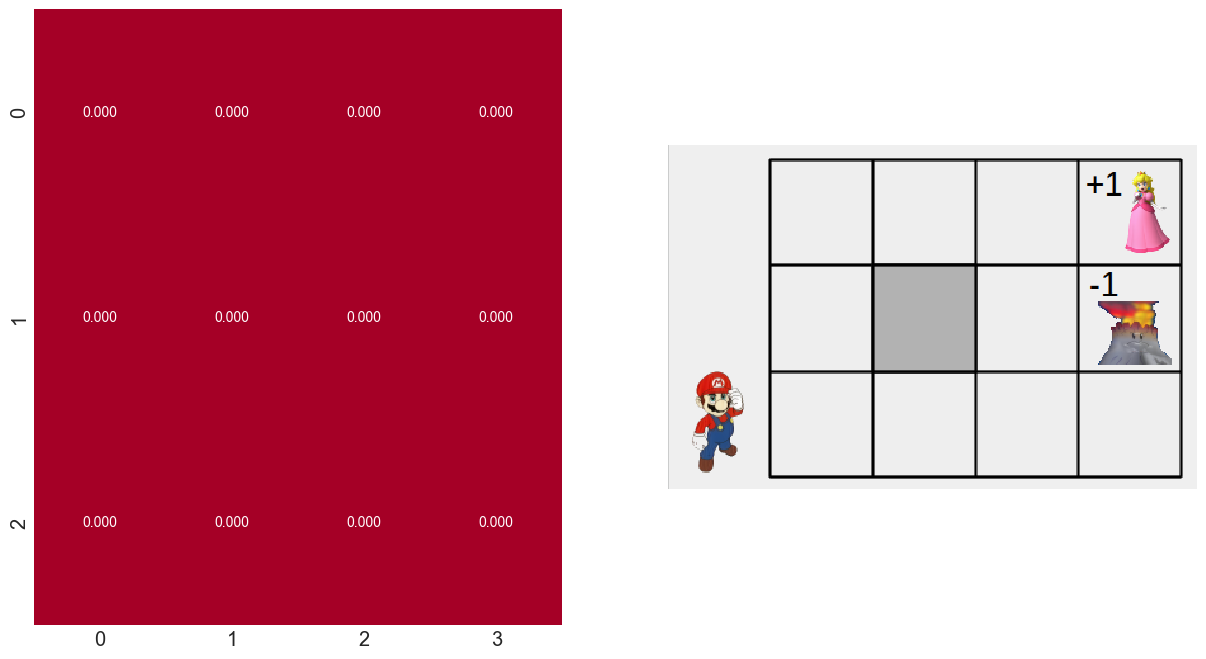

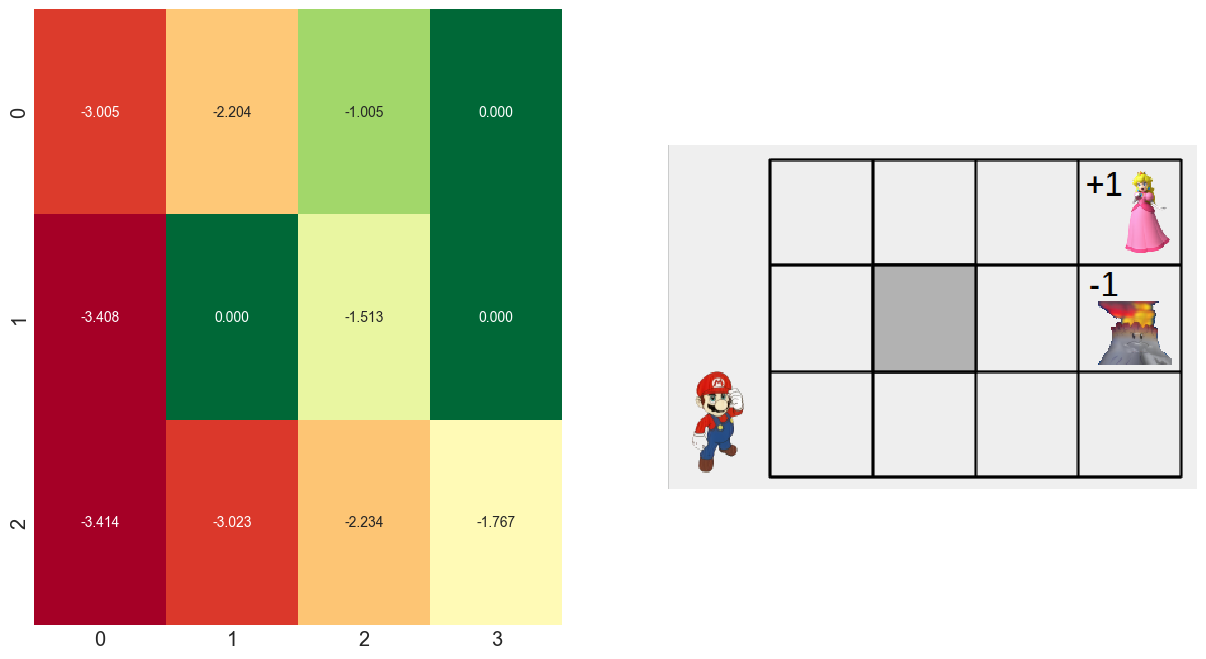

In [12]:
ii = 0       # Counter

change = []    # Collect changes in the state value

#new_V = V.copy()

print("\n\nValues %d: " %ii)

fn_plot_grid(V)

while True:
    ii += 1
    biggest_change = 0
    sum_change = 0      # sum of change in one iteration
    
    for s in states:
        old_V = V[s]
        if s in grid.actions.keys():
            sum_v = 0
            
            for a in ALL_POSSIBLE_ACTIONS:
                grid.set_state(s)
                r = grid.move(a)       # get the reward
                curr_v = r + GAMMA * V[grid.current_state()]
                sum_v += curr_v * 0.25     # Random Policy,so 0.25 in each direction
        
           #new_V[s] = sum_v
            V[s] = sum_v       # online update oif v
            biggest_change = max(biggest_change, np.abs(old_V - V[s]))
            sum_change += biggest_change
    change.append(sum_change)
   #V = new_V.copy()       # Update in one go
    if biggest_change < SMALL_ENOUGH:
        fn_plot_grid(V)
        break

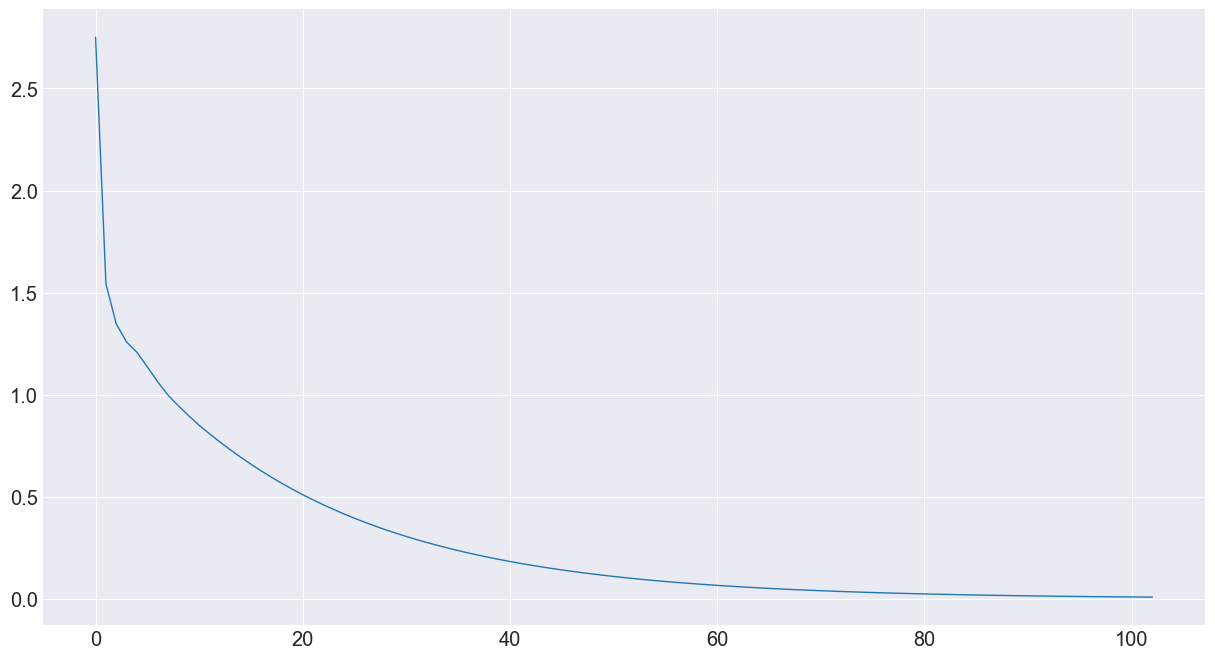

In [13]:
plt.plot(change)